<a href="https://colab.research.google.com/github/singgihan94-ui/FA-ibm-granite/blob/main/FP_granite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn transformers accelerate torch --quiet

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (pastikan nama file sesuai dengan file di Colab)
df = pd.read_csv("/content/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")

# Lihat 5 baris pertama
df.head()


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [3]:
# Cek info dasar
print("Ukuran dataset:", df.shape)
print("\nInformasi kolom:")
print(df.info())

# Statistik deskriptif
print("\nRingkasan statistik:")
print(df.describe())

# Cek nilai kosong
print("\nJumlah nilai kosong per kolom:")
print(df.isnull().sum())


Ukuran dataset: (5000, 12)

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB
None

Ringkasan statistik:
               age       weight       height        sleep         bmi
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.00000
mean     48.805

/tmp/ipython-input-3732415768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="health_risk", data=df, palette="Set2")


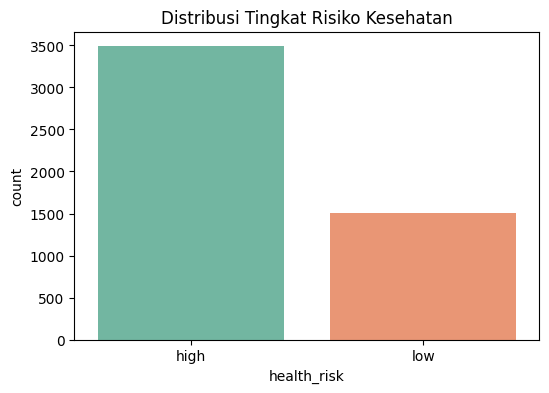

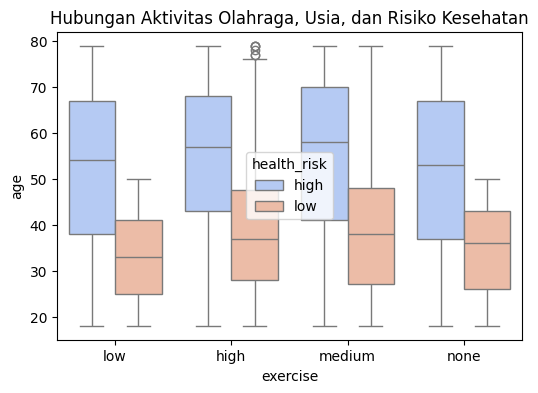

In [5]:
# Distribusi level risiko kesehatan
plt.figure(figsize=(6,4))
sns.countplot(x="health_risk", data=df, palette="Set2")
plt.title("Distribusi Tingkat Risiko Kesehatan")
plt.show()

# Hubungan olahraga dan risiko kesehatan
plt.figure(figsize=(6,4))
sns.boxplot(x="exercise", y="age", hue="health_risk", data=df, palette="coolwarm")
plt.title("Hubungan Aktivitas Olahraga, Usia, dan Risiko Kesehatan")
plt.show()

In [6]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "ibm-granite/granite-3.0-2b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/785 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
# Buat ringkasan statistik
summary = df.describe(include='all').to_string()

# Prompt analisis
prompt = f"""
Kamu adalah analis data ahli dalam bidang kesehatan masyarakat.

Berikut ringkasan statistik dari dataset gaya hidup dan risiko kesehatan:

{summary}

Tolong analisis pola dan insight penting:
1. Faktor gaya hidup mana yang paling berhubungan dengan risiko kesehatan tinggi?
2. Apa hubungan antara usia, kebiasaan olahraga, dan tingkat risiko?
3. Berikan saran atau rekomendasi umum untuk meningkatkan kesehatan masyarakat berdasarkan data.
"""

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=400, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



Kamu adalah analis data ahli dalam bidang kesehatan masyarakat.

Berikut ringkasan statistik dari dataset gaya hidup dan risiko kesehatan:

                age       weight       height exercise        sleep sugar_intake smoking alcohol married profession         bmi health_risk
count   5000.000000  5000.000000  5000.000000     5000  5000.000000         5000    5000    5000    5000       5000  5000.00000        5000
unique          NaN          NaN          NaN        4          NaN            3       2       2       2          8         NaN           2
top             NaN          NaN          NaN   medium          NaN       medium      no      no     yes    student         NaN        high
freq            NaN          NaN          NaN     1985          NaN         2511    4023    3741    3018        644         NaN        3490
mean      48.805600    77.359200   171.933200      NaN     6.997060          NaN     NaN     NaN     NaN        NaN    26.84388         NaN
std       17.906991

/tmp/ipython-input-925046968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='health_risk', palette='coolwarm')


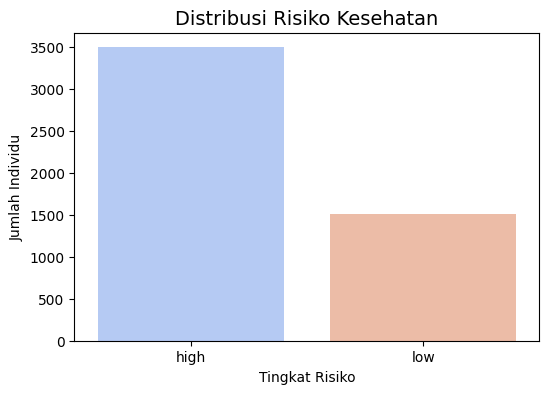

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='health_risk', palette='coolwarm')
plt.title('Distribusi Risiko Kesehatan', fontsize=14)
plt.xlabel('Tingkat Risiko')
plt.ylabel('Jumlah Individu')
plt.show()

/tmp/ipython-input-2643651665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='health_risk', y='age', palette='Set2')


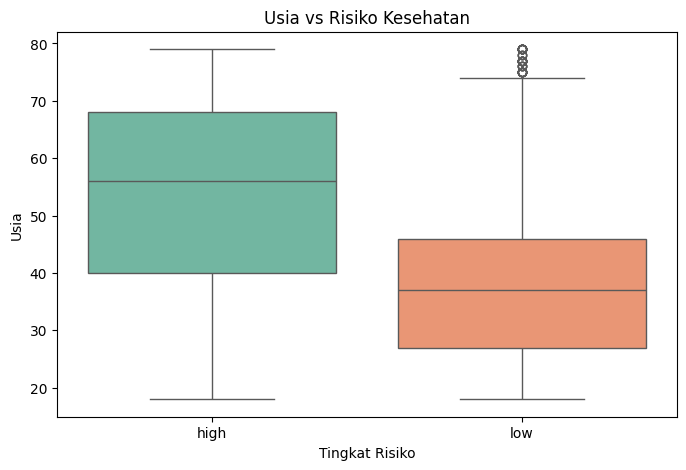

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='health_risk', y='age', palette='Set2')
plt.title('Usia vs Risiko Kesehatan')
plt.xlabel('Tingkat Risiko')
plt.ylabel('Usia')
plt.show()


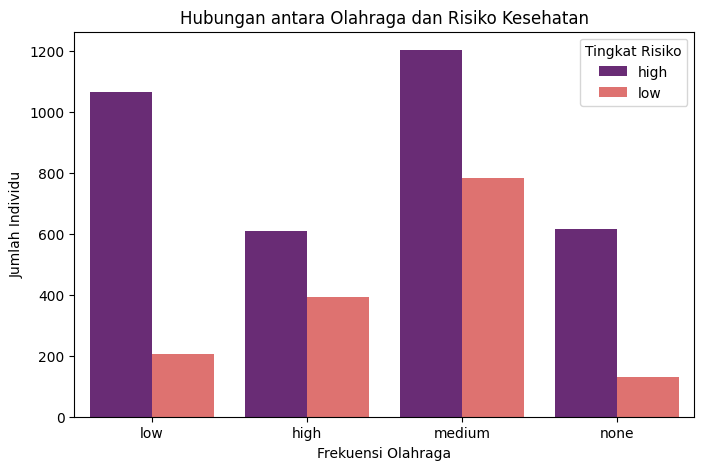

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='exercise', hue='health_risk', palette='magma')
plt.title('Hubungan antara Olahraga dan Risiko Kesehatan')
plt.xlabel('Frekuensi Olahraga')
plt.ylabel('Jumlah Individu')
plt.legend(title='Tingkat Risiko')
plt.show()


In [23]:
prompt3 = """
Berdasarkan hasil analisis gaya hidup dan risiko kesehatan,
buat kesimpulan ringkas dan rekomendasi kebijakan untuk masyarakat atau instansi kesehatan.
Gunakan bahasa profesional dan mudah dipahami.
"""
inputs = tokenizer(prompt3, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=300, temperature=0.6)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))



Berdasarkan hasil analisis gaya hidup dan risiko kesehatan,
buat kesimpulan ringkas dan rekomendasi kebijakan untuk masyarakat atau instansi kesehatan.
Gunakan bahasa profesional dan mudah dipahami.

Kesimpulan:

1. Masyarakat harus memiliki pengetahuan dan kesedaran tentang risiko kesehatan yang terkait dengan gaya hidup mereka.

2. Kegawatan kardiovaskular adalah ancaman kesehatan yang paling umum di Indonesia, dan gaya hidup yang sihat dapat membantu mengurangi risiko ini.

3. Kegawatan jantung dan tekanan darah tinggi adalah ancaman kesehatan yang paling umum di Indonesia, dan gaya hidup yang sihat dapat membantu mengurangi risiko ini.

4. Kegawatan jantung dan tekanan darah tinggi adalah ancaman kesehatan yang paling umum di Indonesia, dan gaya hidup yang sihat dapat membantu mengurangi risiko ini.

5. Kegawatan jantung dan tekanan darah tinggi adalah ancaman kesehatan yang paling umum di Indonesia, dan gaya hidup yang sihat dapat membantu mengurangi risiko ini.

Rekomendasi:

1.